**Image Classification Using Convolutional Neural Network (CNN)**

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

<h4 style="color:purple">Load the dataset</h4>

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [3]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
y_test = y_test.reshape(-1,)

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

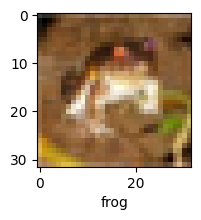

In [7]:
plot_sample(X_train, y_train, 0)

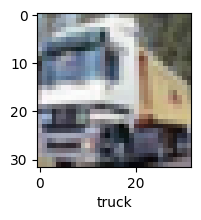

In [ ]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [9]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 397s 253ms/step - accuracy: 0.2755 - loss: 2.2133
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 390s 220ms/step - accuracy: 0.3917 - loss: 1.6911
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 332s 212ms/step - accuracy: 0.4287 - loss: 1.5921
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 379s 210ms/step - accuracy: 0.4452 - loss: 1.5429
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 436s 245ms/step - accuracy: 0.4633 - loss: 1.4970


**You can see that at the end of 5 epochs, accuracy is at around 49%**

In [10]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.43      0.47      1000
           1       0.69      0.31      0.43      1000
           2       0.34      0.33      0.34      1000
           3       0.30      0.25      0.27      1000
           4       0.39      0.38      0.39      1000
           5       0.35      0.43      0.38      1000
           6       0.40      0.61      0.48      1000
           7       0.50      0.54      0.52      1000
           8       0.55      0.62      0.58      1000
           9       0.52      0.53      0.53      1000

    accuracy                           0.44     10000
   macro avg       0.46      0.44      0.44     10000
weighted avg       0.46      0.44      0.44     10000



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [15]:
cnn = models.Sequential([
    tf.keras.layers.InputLayer((32, 32, 3)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.4001 - loss: 1.6526
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6058 - loss: 1.1230
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.6629 - loss: 0.9655
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6966 - loss: 0.8654
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.7175 - loss: 0.8090
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.7471 - loss: 0.7335
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.7580 - loss: 0.6879
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 42ms/step - accuracy: 0.7800 - loss: 0.6345
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7965 - loss: 0.5945
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.8088 - loss: 0.5497


**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [18]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6958 - loss: 0.9485


[0.9549657106399536, 0.6970999836921692]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[3.6591063e-03, 3.4569562e-04, 1.4203877e-04, 3.8204619e-01,
        1.2342049e-03, 6.0937494e-01, 1.3948937e-03, 9.8062708e-05,
        1.6962260e-03, 8.7367998e-06],
       [1.2304104e-05, 1.0344385e-02, 3.9398973e-09, 7.5708788e-12,
        1.8685867e-10, 6.5674828e-14, 1.2359722e-14, 1.3738133e-13,
        9.8953474e-01, 1.0865010e-04],
       [8.0885580e-03, 2.1973677e-02, 2.9630577e-05, 5.9967770e-06,
        1.1525846e-05, 5.3201529e-07, 3.3651975e-07, 4.9553282e-06,
        9.6222883e-01, 7.6558832e-03],
       [6.1680740e-01, 7.5085605e-03, 2.6075993e-02, 6.1100805e-03,
        4.0058582e-03, 2.4263425e-04, 1.5475074e-05, 1.9938224e-04,
        3.3889115e-01, 1.4339066e-04],
       [4.0516218e-07, 2.5035260e-06, 2.1324614e-03, 8.0971420e-03,
        1.9814575e-01, 1.2136167e-03, 7.9039812e-01, 4.8619536e-06,
        4.8189399e-06, 2.2392665e-07]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 6]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

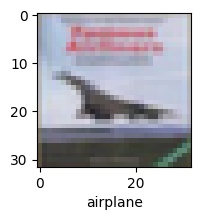

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'airplane'

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_classes)

array([[787,  19,  27,  17,  10,  10,   6,  10,  82,  32],
       [ 34, 794,   8,   3,   3,   6,   6,   4,  37, 105],
       [ 98,   8, 583,  78,  67,  92,  28,  25,  15,   6],
       [ 36,  11,  68, 544,  55, 182,  34,  38,  21,  11],
       [ 36,   3,  92,  91, 598,  47,  23,  89,  20,   1],
       [ 18,   5,  53, 174,  29, 634,  10,  56,  10,  11],
       [ 13,   3,  73, 121,  53,  36, 667,   9,  12,  13],
       [ 24,   1,  33,  43,  59,  77,   2, 743,   3,  15],
       [ 53,  24,   9,  13,   7,   5,   0,  11, 842,  36],
       [ 40,  81,  11,  18,   8,   8,   5,  15,  35, 779]])

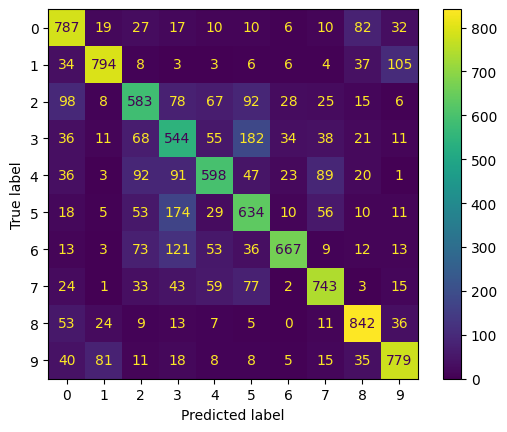

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, y_classes)).plot()